## Задание 2

- решите задачу классификации на ваших данных с использованием рассмотренных моделей sklearn: knn, NB, Logistic Regression, SVM. Не забудьте подобрать гиперпараметры.
- вычислите значения метрик Accuracy, Precision, Recall, F1, ROC AUC score


# Импорт

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.metrics.pairwise import distance_metrics

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, RocCurveDisplay, auc

from joblib import dump

import matplotlib.pyplot as plt

# Загружаем датасет и разбиваем её на выборку.

In [2]:
models = pd.read_csv('../../Data/neo_task_smoted.csv')
X_train, X_test, y_train, y_test = train_test_split(models.drop('hazardous', axis=1), models['hazardous'], test_size=0.25, random_state=42)


# Подбираем гиппер-параметры.

In [3]:
knn_optimal_n_neighbors = RandomizedSearchCV(KNeighborsClassifier(), 
                                             {'n_neighbors': np.arange(1, 3, 1), 
                                              'weights': ['uniform', 'distance'],
                                              'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                                              'leaf_size': np.arange(1, 6, 1),
                                              'p': np.arange(1, 3, 1),
                                              'metric': list(distance_metrics().keys())
                                              },
                                              n_iter=8,
                                              n_jobs=4,
                                              scoring='accuracy',
                                              random_state=71
                                              ).fit(X_train, y_train)
knn_optimal_n_neighbors.best_params_

c:\Users\Mike\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [       nan 0.92619964 0.92619964 0.92545978 0.91564628 0.92619964
 0.92545978 0.92619964]
  warnings.warn(


{'weights': 'distance',
 'p': 2,
 'n_neighbors': 2,
 'metric': 'nan_euclidean',
 'leaf_size': 5,
 'algorithm': 'brute'}

In [ ]:
# knn_optimal_n_neighbors = GridSearchCV(KNeighborsClassifier(), 
#                                        {'n_neighbors': np.arange(1, 3, 1), 
#                                         # 'weights': ['uniform', 'distance'],
#                                         'algorithm': ['ball_tree', 'kd_tree', 'brute'],
#                                         'leaf_size': np.arange(1, 3, 1),
#                                         'p': np.arange(1, 3, 1),
#                                         # 'metric': np.array(distance_metrics().keys())
#                                         },
#                                         cv=2,
#                                         n_jobs=-1,
#                                         scoring='accuracy'
#                                         ).fit(X_train, y_train)
# knn_optimal_n_neighbors.best_params_

# Метод k-ближайших соседей

In [4]:
knn = KNeighborsClassifier(
    n_neighbors=knn_optimal_n_neighbors.best_params_['n_neighbors'] if 'n_neighbors' in knn_optimal_n_neighbors.best_params_ else 5,
    algorithm=knn_optimal_n_neighbors.best_params_['algorithm'] if 'algorithm' in knn_optimal_n_neighbors.best_params_ else 'auto',
    p=knn_optimal_n_neighbors.best_params_['p'] if 'p' in knn_optimal_n_neighbors.best_params_ else 2,
    weights=knn_optimal_n_neighbors.best_params_['weights'] if 'weights' in knn_optimal_n_neighbors.best_params_ else 'uniform',
    leaf_size=knn_optimal_n_neighbors.best_params_['leaf_size'] if 'leaf_size' in knn_optimal_n_neighbors.best_params_ else 30,
    metric=knn_optimal_n_neighbors.best_params_['metric'] if 'n_neighbors' in knn_optimal_n_neighbors.best_params_ else 'minkowski',
    )
knn.fit(X_train, y_train)
y_predicted_by_kn_neighbors = knn.predict(X_test)

## Оценка качества 

In [5]:
print('Accuracy')
print(accuracy_score(y_test, y_predicted_by_kn_neighbors))

Accuracy
0.9331186887165227


In [6]:
print('Confusion matrix')
print(confusion_matrix(y_test, y_predicted_by_kn_neighbors))

Confusion matrix
[[18229  2145]
 [  597 20027]]


In [7]:
print('Precision, Recall, F\n', classification_report(y_test, y_predicted_by_kn_neighbors))

Precision, Recall, F
               precision    recall  f1-score   support

         0.0       0.97      0.89      0.93     20374
         1.0       0.90      0.97      0.94     20624

    accuracy                           0.93     40998
   macro avg       0.94      0.93      0.93     40998
weighted avg       0.94      0.93      0.93     40998



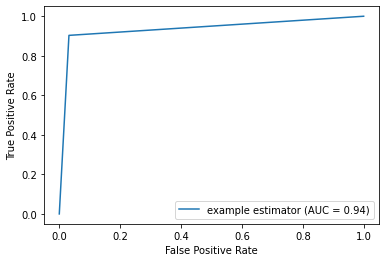

In [17]:
fpr, tpr, thresholds = roc_curve(y_predicted_by_kn_neighbors, y_test)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot()

In [8]:
dump(knn, '../../Pipelines/knn.sav')

['../../Pipelines/knn.sav']